In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler


In [2]:
# the work here is basically that we want to get the plots of the features

In [3]:
# first her, we will have the plots with all the features and 4 classes that we have

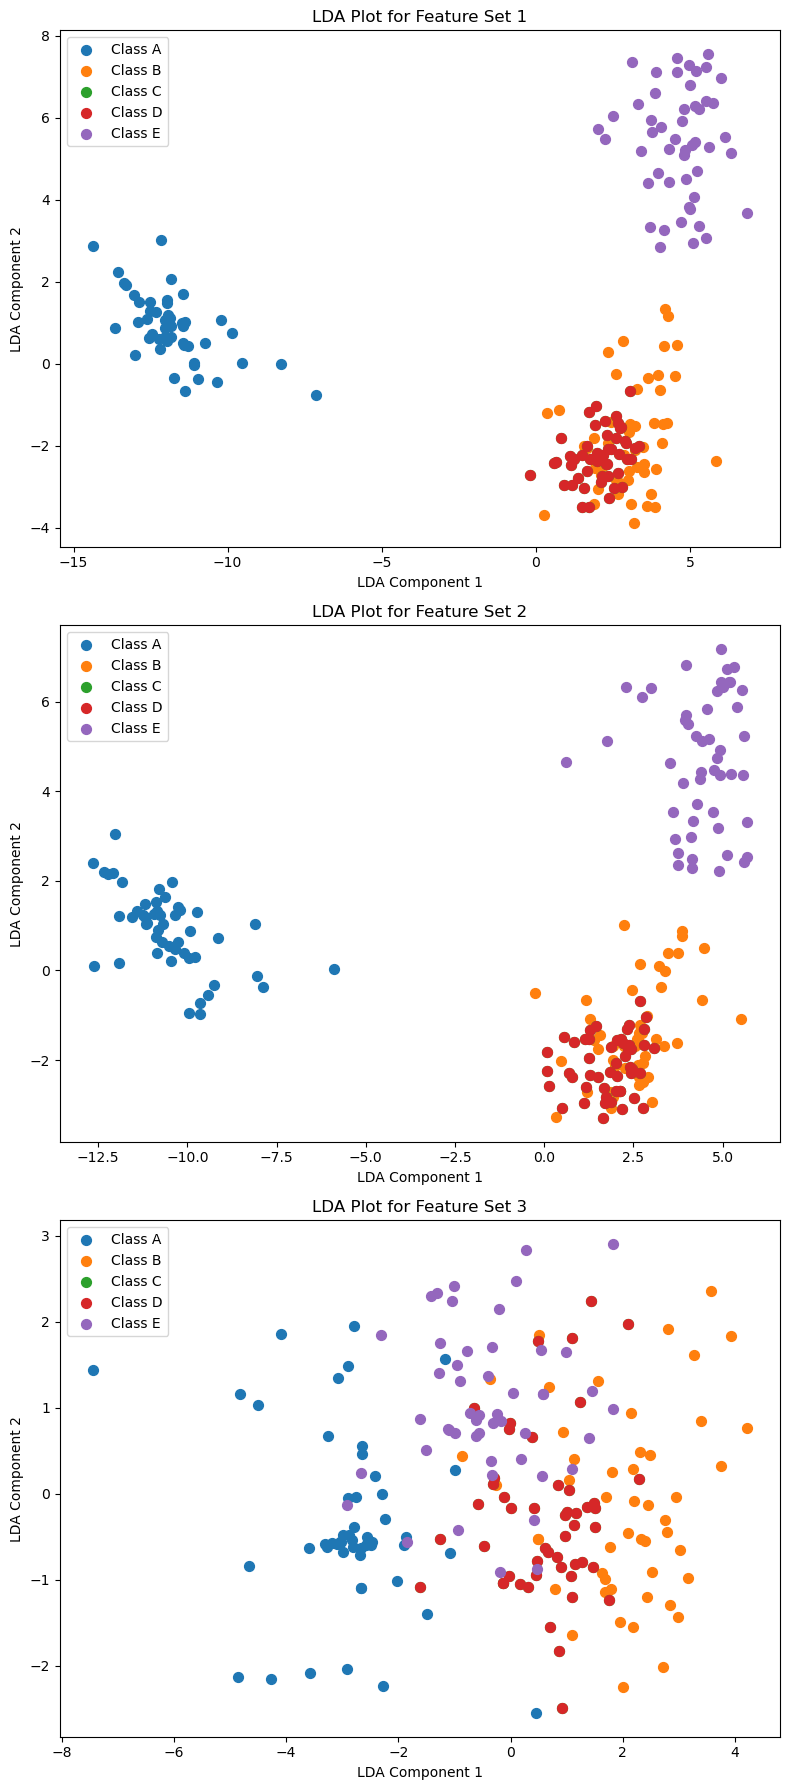

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler

# Step 1: Load the feature data CSV (replace with your actual file path)
data_path = "dist_csvs/column_1.csv"  # Modify this to the location of your features CSV
data = pd.read_csv(data_path, header=None)

# Step 2: Load the label data CSV (replace with the path to your label CSV)
labels_path = "dist_csvs/class_label.csv"  # Modify this to the location of your label CSV
labels = pd.read_csv(labels_path, header=None).values.flatten()  # Flatten to make it a 1D array

# Ensure the labels and features have matching row counts
if len(labels) != len(data):
    raise ValueError("The number of labels does not match the number of feature rows.")

# Step 3: Standardize the features (important for LDA)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Step 4: Define the subsets of features you want to analyze
# Each entry is a list of column indices (starting from 0)
feature_sets = [
    list(range(0, 37)),     # Set 1: Rows 0-17
    list(range(0, 22)),    # Set 2: Rows 18-35
    list(range(23, 37))     # Set 5: Rows 72-89
]


# Step 5: Create the subplots
fig, axes = plt.subplots(len(feature_sets), 1, figsize=(8, 6 * len(feature_sets)))

# If there's only one subplot, axes won't be a list, so we handle it separately
if len(feature_sets) == 1:
    axes = [axes]

# Step 6: Loop through each feature set, apply LDA, and plot
for i, feature_set in enumerate(feature_sets):
    # Extract the relevant features from the data
    selected_features = scaled_data[:, feature_set]
    
    # Apply LDA
    lda = LDA(n_components=2)  # Reduce to 2 components for easy visualization
    lda_result = lda.fit_transform(selected_features, labels)

    # Plot the results for this feature set
    ax = axes[i]
    for class_label in np.unique(labels):
        ax.scatter(lda_result[labels == class_label, 0], lda_result[labels == class_label, 1],
                   label=f'Class {class_label}', s=50)

    # Add title and labels to each subplot
    ax.set_title(f"LDA Plot for Feature Set {i+1}")
    ax.set_xlabel("LDA Component 1")
    ax.set_ylabel("LDA Component 2")
    ax.legend()

# Adjust layout
plt.tight_layout()

# Step 7: Show the plots
plt.show()


In [12]:
unique_classes, class_counts = np.unique(labels, return_counts=True)
print(dict(zip(unique_classes, class_counts)))


{'A': np.int64(50), 'B': np.int64(50), 'C': np.int64(50), 'D': np.int64(50), 'E': np.int64(50)}


In [14]:
# Print the dimensions of the feature data
print("Feature data dimensions (rows, columns):", data.shape)

# Print the dimensions of the label data
print("Label data dimensions (rows,):", labels.shape)


Feature data dimensions (rows, columns): (250, 37)
Label data dimensions (rows,): (250,)


In [17]:
import numpy as np

# Calculate and print the mean and standard deviation for each class in the dataset
for class_label in np.unique(labels):
    # Extract the data for the current class
    class_data = scaled_data[labels == class_label]
    
    # Calculate mean and standard deviation
    class_mean = class_data.mean(axis=0)
    class_std = class_data.std(axis=0)
    
    # Print the results
    print(f"Class {class_label}:")
    print(f"  Mean:\n{class_mean}")
    print(f"  Standard Deviation:\n{class_std}")
    print("="*50)


Class 0:
  Mean:
[ 1.14564266e-03  1.14564266e-03  1.80174106e-01  1.88439299e-01
  1.71626565e+00 -1.71828621e+00 -1.49148482e+00 -1.76359874e+00
  1.73469276e+00  5.28531276e-02 -4.37611749e-01  1.14564266e-03
 -1.81771714e+00  2.08810377e-01  1.72244454e+00  1.14564266e-03
 -1.77837149e+00  4.60320493e-02  2.36730387e-01  1.95492124e-01
 -1.90127122e-01 -8.33210671e-02 -2.71180028e-01 -4.22785711e-02
 -4.55815972e-02 -2.28770914e-01 -3.30288718e-01  1.25189803e-01
  1.69154262e-01  3.26997003e-01 -1.79409966e-01 -1.94078777e-01
 -1.79409966e-01  3.26997003e-01  1.69154262e-01  2.44379621e-01
 -1.36301890e+00]
  Standard Deviation:
[0.99301707 0.99301707 0.97145329 0.96515206 1.05585257 0.32500241
 0.26919195 0.26392331 0.6805949  1.03039652 0.7943833  0.99301707
 0.39697002 0.89470446 0.72055592 0.99301707 0.3292516  0.96953291
 1.02219777 1.0548721  0.97290469 0.85171224 0.79814352 0.9661418
 0.93433264 0.97587491 0.95960321 0.8617435  0.9493654  0.8742817
 0.87758993 0.75902857 0.

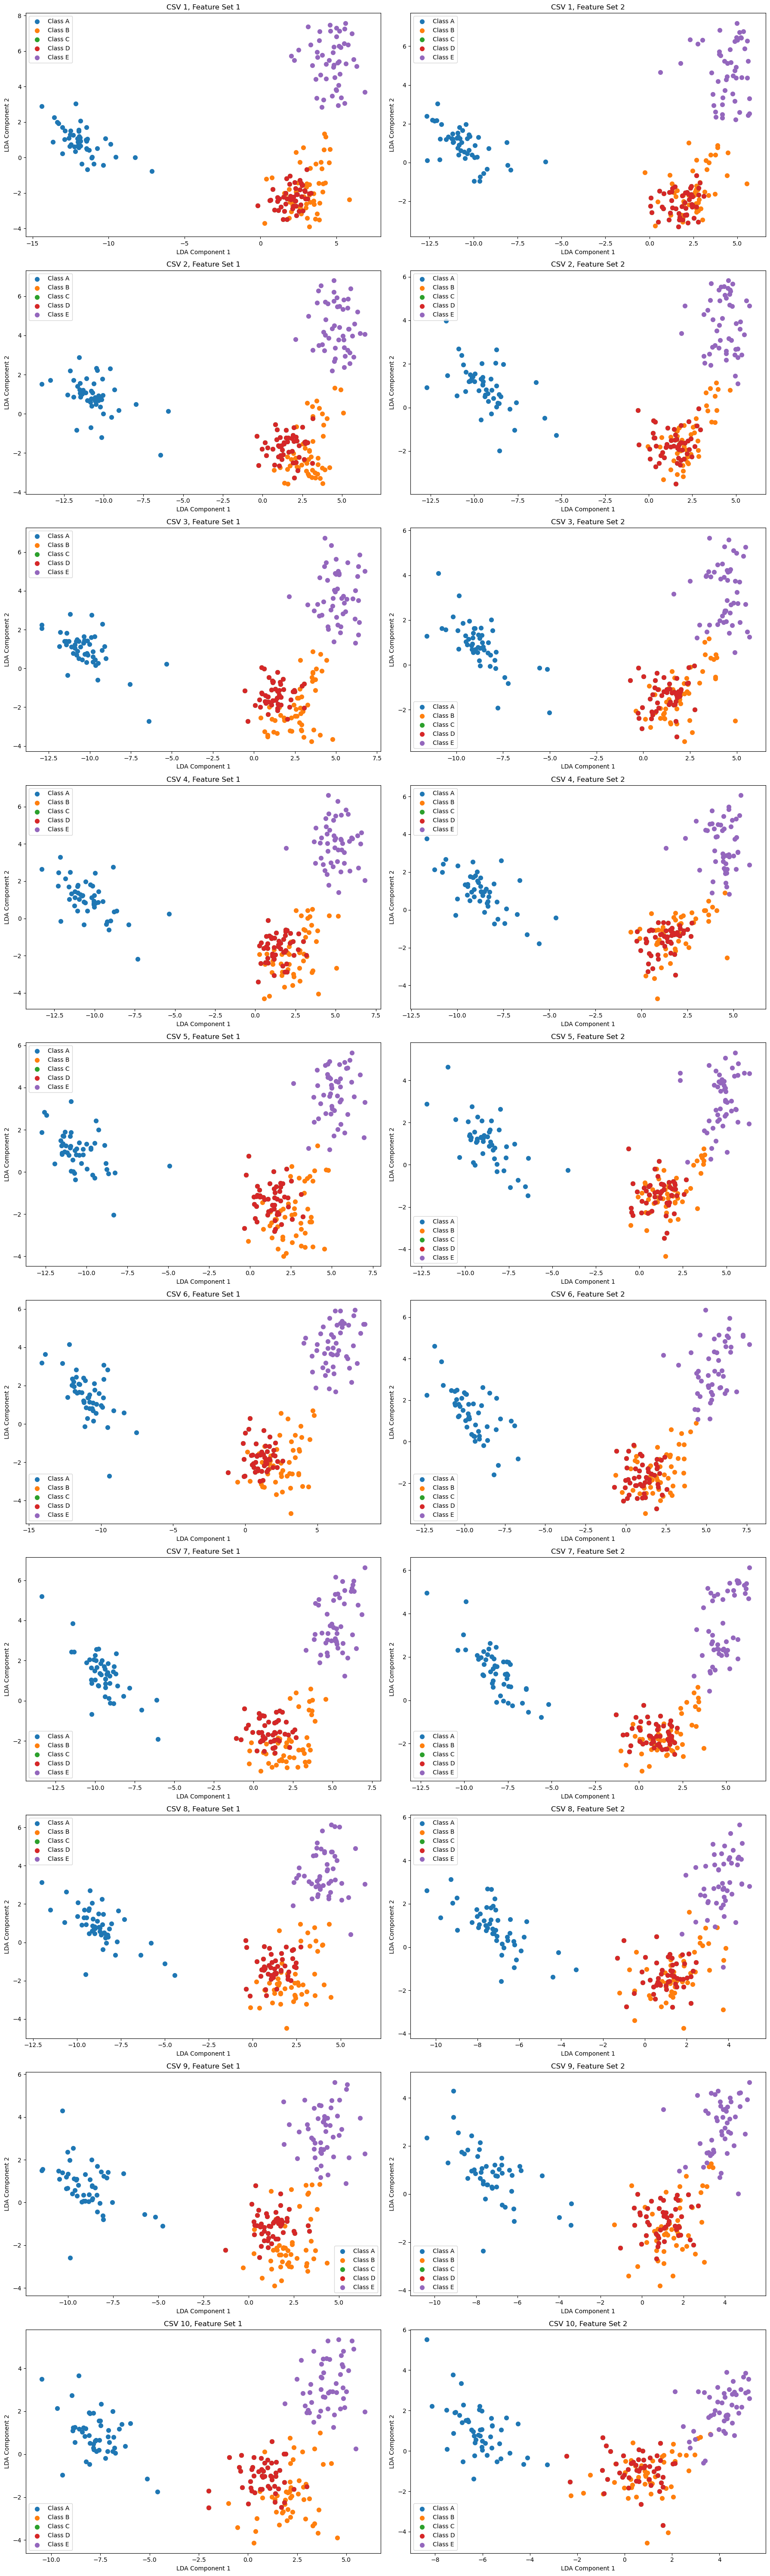

Saved the 3x10 grid of LDA plots as lda_grid_plot.png


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler

# Define the file paths for your data (adjust paths as necessary)
data_paths = ["dist_csvs/column_1.csv", "dist_csvs/column_2.csv", "dist_csvs/column_3.csv",  # Add more paths for other CSVs
              "dist_csvs/column_4.csv", "dist_csvs/column_5.csv", "dist_csvs/column_6.csv",
              "dist_csvs/column_7.csv", "dist_csvs/column_8.csv", "dist_csvs/column_9.csv",
              "dist_csvs/column_10.csv"]

labels_path = "dist_csvs/class_label.csv"  # This is the common label CSV for all data

# Load the label data CSV
labels = pd.read_csv(labels_path, header=None).values.flatten()  # Flatten to make it a 1D array

# Ensure the labels and features have matching row counts
for data_path in data_paths:
    data = pd.read_csv(data_path, header=None)
    if len(labels) != len(data):
        raise ValueError(f"Labels and data in {data_path} don't have matching row counts.")

# Step 2: Define the feature sets to plot
feature_sets = [
    list(range(0, 37)),     # Set 1: First set of features
    list(range(0, 22))     # Set 2: Second set of features
    # list(range(23, 37))     # Set 3: Third set of features
]

# Step 3: Create a 3x10 grid of subplots (for 10 CSV files and 3 feature sets per CSV)
fig, axes = plt.subplots(nrows=10, ncols=2, figsize=(18, 60))

# If there's only one row or column, axes won't be an array, so we need to handle that
if len(data_paths) == 1:  # Only one CSV
    axes = np.expand_dims(axes, axis=0)
elif len(feature_sets) == 1:  # Only one feature set
    axes = np.expand_dims(axes, axis=1)

# Step 4: Loop through each CSV and each feature set, apply LDA, and plot
for i, data_path in enumerate(data_paths):
    data = pd.read_csv(data_path, header=None)
    
    # Standardize the features
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data)
    
    for j, feature_set in enumerate(feature_sets):
        # Extract the relevant features from the data
        selected_features = scaled_data[:, feature_set]
        
        # Apply LDA
        lda = LDA(n_components=2)  # Reduce to 2 components for easy visualization
        lda_result = lda.fit_transform(selected_features, labels)

        # Plot the results for this feature set
        ax = axes[i, j]  # Get the appropriate subplot in the grid
        for class_label in np.unique(labels):
            ax.scatter(lda_result[labels == class_label, 0], lda_result[labels == class_label, 1],
                       label=f'Class {class_label}', s=50)

        # Add title and labels to each subplot
        ax.set_title(f"CSV {i+1}, Feature Set {j+1}")
        ax.set_xlabel("LDA Component 1")
        ax.set_ylabel("LDA Component 2")
        ax.legend()

# Adjust the layout to prevent overlapping labels and titles
plt.tight_layout()

# Step 5: Save the entire figure (3x10 grid of plots) as an image
plt.savefig('lda_grid_plot.png', dpi=300)  # Save the figure to a PNG image with high DPI

# Show the plot in the notebook (optional)
plt.show()

print("Saved the 3x10 grid of LDA plots as lda_grid_plot.png")


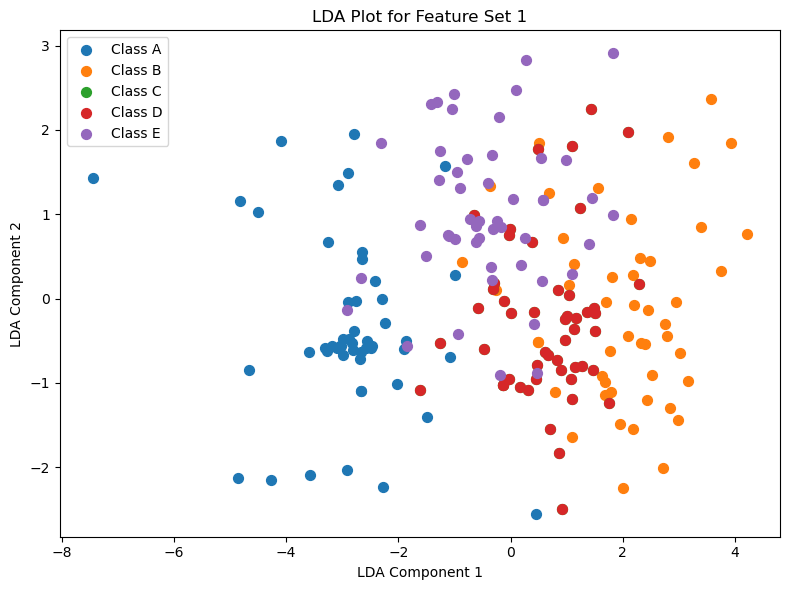

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler

# Step 1: Load the feature data CSV (replace with your actual file path)
data_path = "dist_csvs/column_1.csv"  # Modify this to the location of your features CSV
data = pd.read_csv(data_path, header=None)

# Step 2: Load the label data CSV (replace with the path to your label CSV)
labels_path = "dist_csvs/class_label.csv"  # Modify this to the location of your label CSV
labels = pd.read_csv(labels_path, header=None).values.flatten()  # Flatten to make it a 1D array

# Ensure the labels and features have matching row counts
if len(labels) != len(data):
    raise ValueError("The number of labels does not match the number of feature rows.")

# Step 3: Standardize the features (important for LDA)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Step 4: Define the subsets of features you want to analyze
# Each entry is a list of column indices (starting from 0)
feature_sets = [   # Set 2: Rows 18-35
    list(range(23, 37))     # Set 5: Rows 72-89
]


# Step 5: Create the subplots
fig, axes = plt.subplots(len(feature_sets), 1, figsize=(8, 6 * len(feature_sets)))

# If there's only one subplot, axes won't be a list, so we handle it separately
if len(feature_sets) == 1:
    axes = [axes]

# Step 6: Loop through each feature set, apply LDA, and plot
for i, feature_set in enumerate(feature_sets):
    # Extract the relevant features from the data
    selected_features = scaled_data[:, feature_set]
    
    # Apply LDA
    lda = LDA(n_components=2)  # Reduce to 2 components for easy visualization
    lda_result = lda.fit_transform(selected_features, labels)

    # Plot the results for this feature set
    ax = axes[i]
    for class_label in np.unique(labels):
        ax.scatter(lda_result[labels == class_label, 0], lda_result[labels == class_label, 1],
                   label=f'Class {class_label}', s=50)

    # Add title and labels to each subplot
    ax.set_title(f"LDA Plot for Feature Set {i+1}")
    ax.set_xlabel("LDA Component 1")
    ax.set_ylabel("LDA Component 2")
    ax.legend()

# Adjust layout
plt.tight_layout()

plt.savefig('dft_lda_plot.png', dpi=300) 

# Step 7: Show the plots
plt.show()
